<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 (Problem 1) - Sentiment Analysis Model  (Group)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [2]:
# Import the Required Packages
import spacy
from spacy_langdetect import LanguageDetector
from googletrans import Translator
from langdetect import detect
from textblob import TextBlob
import string
import numpy as np
import re
import pandas as pd
import os
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, Dropout, LSTM, GRU, Flatten, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
import nltk
from nltk.corpus import stopwords
%matplotlib inline
from tensorflow.keras.layers import Embedding, GRU




## Step 1 – Data Loading and Processing (Group)

### 1.1 Data Loading

In [3]:
## Open and read file

base_dir="C:/Users/user/Desktop/Year 2/Deep Learning/Deep Learning Assignment 2/dominic"
filename = "instagram_reviews.csv"
path_to_file = os.path.join(base_dir, filename)
df = pd.read_csv(filename)
print(df.shape)
print(df.info())


(40000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              39999 non-null  object 
 1   userName              39999 non-null  object 
 2   userImage             40000 non-null  object 
 3   content               40000 non-null  object 
 4   score                 40000 non-null  int64  
 5   thumbsUpCount         40000 non-null  int64  
 6   reviewCreatedVersion  31235 non-null  object 
 7   at                    40000 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 3.1+ MB
None


In [4]:
# Ensuring each value has 8000 reviews
# Balanced dataset ensures machine learns fairly and will not be biased to any values

df['score'].value_counts()

1    8000
2    8000
3    8000
4    8000
5    8000
Name: score, dtype: int64

### 1.2 Data cleansing

In [5]:
## Converting emojis & removing emoticons

# Step 1: Replace emoji with relevant word it represents
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace("_","").replace(":"," ").replace(",","").split("_")))
    return text

with open('Emoticon_Dict.p', 'rb') as fp:
    Emoticon_Dict = pickle.load(fp)

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in Emoticon_Dict) + u')')
    return emoticon_pattern.sub(r'', text)

In [6]:
# Converting df reviews to list and applying the functions

# Removing emoticons because they are uncommon and could confuse the machine (low sample size)
# Converting emojis because they are common and will help with the context and prediction of the review

reviews_list = df['content'].tolist()
reviews_list_c = []
for review in reviews_list:
    processing = convert_emojis(review)
    final = remove_emoticons(processing)
    reviews_list_c.append(final)


In [7]:
# Testing if the functions are working as intended

test_emoji  = "wow😀hi"
test_emoji = convert_emojis(test_emoji)

test_emoticon = "This is a :^)hi"
test_emoticon = remove_emoticons(test_emoticon)

print(test_emoji)
print(test_emoticon)

wow grinningface hi
This is a hi


In [8]:
# Ensuring reviews_list_c is in the correct shape and ensuring that all emojis are converted

print(len(reviews_list_c))
for review in reviews_list_c:
    print(review)

40000
The app is not opening after the update. After many uninstalls and installs the same thing is repeated.
Super Ok
I cant install my instagram app I have tried it for past 4 days But i couldnt install it still
This is time wasting app for me.
This app is not working sir plz fix it I can't open my Instagram app I already report many time but I didn't get any reply or can't solve my problem plz sir fix it as soon as possible.
App in not open what We can login
Cant login once i logged out black screen wont go  slightlysmilingface  please resolve it
Super
I've been using this app for a long time, but lately it's not working very well and I can't log in to some of my profiles.
While I'm about to add my story The sing list is unavailable And this application nowadays is not working properly
Glitchy af
New timeline can't press "more" to read more description. Just dim the apps.
Few days Instagram is not work properly email code are sent very late
Its not good app always hai glitches hai p

Few features are not working Like replying toh direct messages Liking with emogies are not working
The latest update is not allowing me to like and follow people
Sbse bdi prblm story glitch.. Story me kaafi saare feature h jo kbhi bhi gyb kr dete h jase add yours. Suggest song vala ..to bhot hi bekaar chl rha h insta abhi to  thumbsdown  thumbsdown  thumbsdown  thumbsdown  thumbsdown 
Khub valo
Saved picture and video are not able to open i don't know what is wrong with Instagram from past 6 months and now it's irritating alot
reel option not available why?
When open the app in always stay black screen and there is no solution.  thumbsdown  thumbsdown  thumbsdown 
It has more bug than other's account My account is full of bugs I complaint many times with screenshot of the bug but they didn't resolve it
My Instagram is not working
So many bugs...story comes blurred.
Too many bugs. The music starts playing after I turn it off in the stories, my followers sometimes falls down to 0, and ma

Can't even access via the app. Just keep getting a blank white page
App is not opening
Didn't even let me log back in. If anyone is being frank Instagram is aggressively the the most vapid and useless of social media platforms. That being said, it's also agressive in it's use of personal data and locations. As a result, will no longer use the software.
Music problem
Instagram music is not working properly Because when I search many songs but result don't show more than songs it's showing only 10-15 songs
why it not opening in my ph...i reinstall again nd again but no response..
IG has been my most favorite app for years up until recently. I could add music to my reels when I create them but once they're posted/uploaded, there's no more audio. I edit my reels through the app and use the music that insta suggested but still there's no audio in the uploaded reels. Hope this will get fixed!!!
Why insta... Showing unknown accounts post in home without followers post complete watching... In 

Didn't respect freedom of expression
Op
It's app is garbage. I upload three short video. Few moments later I got a massage that I use 50% my data 1.50GB I shoked... Then my face just like this emoji angryfacewithhorns  angryfacewithhorns  angryfacewithhorns 
My Instagram is not working ........
Nice Instagram
Thenks
Arjuna
I uninstalled and trying to install again. But it's not getting opened at all. Showing a white screen. What's going on???? Helppppp
instagram is not working in my phone i am getting white screen while opening instagram on phone
No full screen in this app  poutingface  poutingface 
my account got suspended and then it affected my other accounts. i cleared my data and did the troubleshooting procedure but when i opened the app, it's just black. i left it for 2 hours and i didn't get anything, just pure black. no sign up or log in option. i’m running my business through Instagram please fix this bug or something.
Ye white cren kea jaldi thike karo
I'm begging you. Give 

While uploading video reels..it gets blurred all the time
Past 15 days I'm getting black screen when I open instagram
Instagram is annoying The app isn't opening at all Very fustrating
For the last few days Instagram isn't working properly.It goes blank whenever i try to open....please resolve the issue
Nice  heartsuit ️
My app is blank from 2to 4 days just blank  unamusedface  sleepyface 
Good
My story won't even go away. It's been there for over a week. Yoy developers really suck at developing if users have to updated every single week, constantly. Get it together.
Nice
instagram music is not available for my id and pls add music in my story
Latest update is not comfortable to use. The news feed is very lag and show me lot of people that I never follow them. Please fix it.
In last few days... Apps is struggling
Last few days the app was not working and not opening
For tha last few days the app isn't working properly whenever I try to open its goes blank and stuck tha app plz solve th

Yisie
I dont know why my instagram is no t workin its showing bllacksreen all around when i usee too open it plss help mee .
Not showing  confusedface 
Not open this app
Girls are not giving reply
App is not warking please solve the problem  downcastfacewithsweat 
Good
Can't log into another account now. It just turns to a white screen. Not a data problem either..
وحش جدااا
When I install insta and opened white screen only comes nothing else I tried many times to install and uninstall but it's not happening so plz try to solve this glitch
I need help When ever I'm opening my Instagram an black screen is appearing I tired every possible way but its not solved plz help
My instagram cannot work in my mobile ... What is problem ? This application not opened
This app does nothing but sensor free speech and it's so hard to use even the most basic functions
Instagram op
Not able to login a full white screen appears
It is not opening  pleadingface 
Mera instagram nahi on ho raha hai
E my life 

Used to be a great app. Now I feel like I see more "content" from pages I don't follow than I see from pages I do follow. This app is a cluttered mess now. The videos keep freezing. I have to scroll away then scroll back, and even then it'll frequently freeze again. It's been doing this for a couple years now, how is this a problem for an app made to share pics and videos? (Update. Three different Samsung phones. Videos still freeze all the time
Op
It is not working
Have internet access until I get it ! facewithrollingeyes 
I'm not able to login to instagram. It doesn't load at all and the screen is completely blank. I have reinstalled the application multiple times and even restarted my phone multiple times it's just not working. Could you please look into this asap and get this sorted.
Nice app
One does not simply make a post by applying filters or just editing: crashing, picture spoiling, other bugs.
The app keeps failing to load up and just has a white screen saying server fail .
P

My chats are getting deleted by itself please check
Main Instagram se bahut pyar karta hun
There is a slight issue I can't see posts or stories even though I can chat plz fix this
not opening
 slightlysmilingface 
Some time its not working good
is app ma mana password rakha tha par ya open nahi ho raha ha
Jyg wkwb wjebeb msush
Hello dear instagram team... i can't send massage to anyone if it will send i can't receive replies and the call is not ringing....... please fix my problem as soon as possible  foldedhands  foldedhands  thank you  smilingface ️
App is not opening and it is not showing anything and
It keeps freezing everytime I am watching a reel  pleadingface 
Messages keep glitching most of the times. Many bugs in the app
Ok ok...
I can't open my application
My gram was working very nicely but idk what happened i am not able to receive any dm from anyone which honestly sucks it shows like (network request failed i tried every possible thing i can but still ain't working I hope 

Please, stop adding useless features and just give us an edit comment button. Also, allow me to place my reels back onto my profile grid.
Super
I just don't know what the hell is going on with this app....After install this ...That is not showing even to login....Hated this  facewithrollingeyes  facewithrollingeyes  facewithrollingeyes 
I want an issu can u call me
About that filters no matlab pehele mujhe photo pr filter lagane ka option aata tha bt today suddenly I noticed that ki wo option waha se gayab hai than whts the problem ??
Not make new friends
I don't know how to get in my live friend  loudlycryingface  loudlycryingface  rollingonthefloorlaughing  rollingonthefloorlaughing 
The only things that load on my feed are the ads. Everything else is just blurred. The help page doesn't even load. This app is now non-functional. I deleted and reinstalled and that made it work for about a half day. Now it's back to 100% blurred images except for ads. It sucks.
I've been trying to open

ᴋyᴀ ꜰᴀʟᴛᴜ ᴀᴩᴩ ʜᴇ ʟᴀᴅᴋɪyᴀ ʀᴩʟy ɴʜɪ ᴅᴇᴛɪ
Neha,
I HAD 60 SECOND STORIES FOR LIKE TWO DAYS BEFORE THE FEATURE DISAPPEARED IM SO UOSET pls give it back to me ill give u a better review if you do  frowningface 
रील्स् बनाते समय यह बकवास एप् अपने आप बन्द हो जाता है
Lover
Amil saisi
Asish yt
Music is not available it's my problems
Hilo Namaste
My Instagram the filter are not working
For many years I used Instagram as my only social media outlet. It served me fine. Then I lost access to my Instagram account and to try and regain access I created a new one. Before I could even use the new account, it was immediately disabled. The reason given was I had done something against community standards. But as I said I never even opened the account yet. It remains disabled and I remain without an Instagram account that's useful . This stinks!
Nhi
This program has crashed it has been down for 3 days This is a excellent program but they are ruining it with too many ads
 loudlycryingface  loudlycryingface 

Swipe right to chat options is not working. Earlier by right swiping chatting window was working. Kindly do needful.
I will give 3 stars for this app because in this app so many glitches happening
Good
Q App is not working in my mobile, tell me what is problem
Kisa faltu app kai koi ladki hi nahi pat ti
No making reel
Please have same font style for all phone specifically font style in writing words in Ig story.  — am I the only one whot thinks this app have a discrimination considering fonts in Ig story between Apple and Android?  victoryhand  lightskintone lol
It's good I use it alot but there's some thi gs they could fix. It glitches alot and when I facetime I can see they're screen because it's just all black pls fix this thank you.
Data khatam
Binod kaka
Hooo my .... This is best ...one...for .... My...insta account.... im-gsk-07 Follow. Me on Insta..... ....
Good
Good app
Might have been in my office in the next two  two-thirty  days  facewithtearsofjoy  facewithrollingeyes  face

It's fun some how sometimes it has sudden crashes and my ig got white screen since 5-6 days idk maybe the creater of the app fix it  clappinghands  lightskintone  more that it's alright
what a joke ! reel button not show for many users! its bad
Very good
I will giving u 3 stars only becouse i am upset with u sir my problem is that i have not messenger option and i will create a reels but instagram was not giving me vieus  pensiveface  plz see my problem my insta id tulsibhardwaj06 i hope u undestend my problem  foldedhands 
Why my insta don't have voice call option plz fix it
Gltuch
When typing (specially commenting in Persian; the format and the order of the words gets messed up if typing some numbers! And there's no "font size customization" built in; in order to adjust the word size, you must make the whole app appear bigger in your phone's setting!
2/3 videos on my feed are frozen visually but the sound continues. Unsure if this is my phone or the app. Any ideas pls?
Nice but have 

 redheart 
Mera video viral nahi hota why...mujhe viral karo...acche acche my video dalogi phir mujhe paise kamana hai
Nice aap
Hi, why is there no reel option on the app I downloaded? Please I need a solution urgently
This is the one of the best app I had ever used but one thing I didn't like and that's it's consumes the most internet as compare to other apps. Please do something for this.  victoryhand ️ Otherwise this is the best app  grinningfacewithsmilingeyes 
I don't know what's the problem with new updates. Firstly, when someone forwards me a instagram link on whatsapp, every time a different link opens up. Secondly, in reels I cannot "text-to-speech". Have seen so many tutorials but in vain.
Some glitches not fixed yet when notification come from insta and if I enter to view it there's a glitch that message is not able to see and many other so fix it  slightlysmilingface  kitchenknife 
Nice app
It used to be a fast way to connect with social lives but nowadays it's really so sl

Mera insta ni chal rha ... Post v ni dikh rha
This app is outstanding
Good
Glitches
Its good
Good
What is Instagram now? It seems to be having an identity crisis. All of my feed is filled with videos. I'm interested in photos. Can I switch off the videos? Perhaps stop trying to imitate other platforms and return to the original formula.
I ratting 3 star to 4 star bcoz some time I want to unsend my msg but it doesn't work properly
D vcytagb wcw ard sscd.,x z.
Its okay
So much addict
Video chat quality is too poor
Hey if there's anyone who could help... I recently deactivated my account for a few days. It's been one week since then today. I have tried multiple times to login again since 2 days but it shows error, please try again later. And sometimes when I try logging in using my linked Facebook account, it shows no account found. There's no way my account can get deleted right? I didn't delete my account, I just "temporarily deactivated" it. Please help.
App is good but after updating 

It has a glitch
I lost my reels which are in drafts. Why don't you make a retrieve for them after re-login. I got totally upset with this setting of totally deleting Drafts folder.
Excellent aap
Nice app it's so prity
Nice
Great app
I just love this app redheart 
Good
Just wow
I like instagram plzz send me follower my id official_rahul_balmiki send me plzz follower -1k send me i love you instagram
Excellent
Nice
Excellent  thumbsup 
Very good
User friendly
 grinningfacewithsmilingeyes 
𝙑𝙚𝙧𝙮 𝙜𝙤𝙤𝙙 𝙛𝙤𝙧 𝙣𝙞𝙘𝙚
I like this app  redheart ️
It's over all really good, but some of my videos randomly disappeared and I had to reupload.
No 1 app
Better AAP
80000 ke shoes hai..
I love this but I have not reel option please enable this option
Good
Abi to 4 star diye he..yadi meri reel nhi chali to 1 star de dunga.. zanyface  winkingfacewithtongue 
Faizan
Very nice application  redheart ️ redheart ️
Very nice app
Nice,2
$uper.... smilingfacewithhorns 
New product for sales for people
Maine isliye four 

My Instagram isn’t working  loudlycryingface  loudlycryingface  loudlycryingface 
Osm best appp
So Lovely and nice
Good
#op binod #op #op instagram
Nothing to say  smilingface ️
I've had this app for a while now, and it is starting to glitch daily. My messages won't send, Instagram will put itself into dark mode, the captions will have a black backgrouns, etc. I love this app, but it's getting harder and harder to communicate and stay satisfied with it.
Better app
Not responding
The app is good but From yesterday I haven't received any message like the message is sent by me but I didn't receive any reply plz do something!!!
Very worst app
The best
ITS AAP USE SO DETA
Sometimes glitch happen and the reels video should be user handy
Very good
Mast
Very nice  slightlysmilingface 
From last night facing problems at chat section all msg are freez when I m doing refresh all msg are gone or got 13h ago msg unseen msg and recently chat not updated ...so check instagram and fix this ... May be 

Needs still improvement
Lovely
Nice app
Nice
Great experience
Nice app
Fix the glitches and bugs plz
I want Instagram plz
Bachu
Nice
I enjoyed a lot but after 90 videos i was unable to upload videos but i was able to watch reels so i liked it
On my Instagram account, react option is not working.Please solve the problem as soon as possible. stay Peace,take love heartexclamation ️ username_o_r_n_e_o_u_s_b_b_y
Great!!!
 smilingfacewithheart-eyes  smilingfacewithheart-eyes 
Good app
Nic
I like this app and it is the very good app now i have one problem me my friend account is blocked again search the my Friend account not found my friend account why this is my one problem please solved the problem
Super
Blank screen is appearing on opening instagram
Good
Fabulous
Mera Instagram open nahi ho raha hai
Story like option nhi hai
I am unable to submit report fix this..
Mera Instagram open nahi ho raha hai
Nice app with nice filters.
Great!
nice
My mobile data is gone  cryingface  upside-downfac

Good
Good
Nice
Best entertaining
super app
Best Social Media Platform
 angryfacewithhorns 
Secre
,iil9
Good  thumbsup 
I can not post the video..?? Why Plzz solve the my problem  angryface  angryface 
Yogendra meena jii
 slightlysmilingface 
 thumbsup  thumbsup  thumbsup  thumbsup  thumbsup 
Download nahi ho raha hai
Nice
Nice app My fervet application
Much better than others apps
Reals are sooo nice
Gnk
 thumbsdown 
In sha
Nice
Very good app with full security
Neyaz
Kashyap
Perfectooo
Nice but so old sistem
 moai  moai  moai 
V good
IG feels less..childlike than fb,people seems more authentic and less sparky.
Super
Wonderfull.. Its amazingg... Tuu mch fun.. And have ni words tu explain it... Just it was best nd best..8 love it ylll have no words....lil funny.........  star   star   star   star   star 
Ii
 huggingface  huggingface 
This app is so nice And it is very usefull app
Nice
Idi marindi kattindani nivasistuu jarigina i oxphord chivara visistata
Niraj
Hey... This is an beautiful

Love
Vv good
Amazing aap
Mustak shaikh
this is good aap and very nice goll
Its great, but can i get a same way story repost like ios in android to make it beautiful
Op
High level
Bassu Nayaka
 redheart ️ redheart ️ redheart ️
Very thankful  growingheart 
Nice app
Hhj
Nice
Superb
Nice  thumbsup  insagram  blackheart 
Good
I love it
Instagram reels upload problem and very very ... Lag
Ok
I like this app
It's great.
Cool features like my gf
 thumbsup 
My I'd vijay 143
Good
Just loved it
Nice app
My insta no swipe msg are allowed why
Very nice
Love it
Good
Superb sparkles 
Very good at all times
I liked it its super app  crescentmoon 
Great
Best social media application
Good
No words
Loveit
Smokin'
Awesome way of expressing and sharing moments
جاااااااالیه
This app is a good app. I have a look at the moment. I have a look at 5, and I will be a good idea to have been in the UK.
 redheart  redheart  redheart  redheart  redheart  redheart 
Gjb
bc2vbycw Eva 4G e e eceeeeecece4 we c c cervs 2me

Was this helpful
Hello my instagram doesn't turn on it just has a black screen i request you to saddle this black screen saddle on my instagram  foldedhands  lightskintone  worriedface 
Nice app
Super
Awesome
I love it
Super  beamingfacewithsmilingeyes 
This app is the best time to go post my kpop  SouthKorea  microphone  purpleheart  content
Very nice app is this  thumbsup 
এমনিতেই দিলাম  personshrugging  mediumskintone ‍ femalesign ️ personshrugging  mediumskintone ‍ femalesign ️৫তারা
Data waste application  poutingface 
I love Instagram
Rupesh
No words
Edited the review superb app smilingfacewithheart-eyes 
Bhargv
खुप छान
 heartexclamation  heartexclamation  heartexclamation  heartexclamation  heartexclamation  heartexclamation  heartexclamation 
Nub
Nice app
Verry good app
Instagram super nice appa s. sparkles  thumbsup  heartsuit ️ heartsuit ️ heartsuit ️ heartsuit ️
গুড
Downloads apps
Nice
Best app
Doesn't work.
Good
Nice
i love this app
Wow amazing reels Best options no hacker
T

Ramjani..kumar
Love
Nice app
Very nice
It is the bast
Mera instagarm calu nhi horha
Fun
This is very interesting app  smilingface ️ thumbsup 
It was really great app
Awesome
بدی. م
Beautiful
Super
reels problem
Very nice class Thaku mam
Nice
Bagus
Mera Instagram chalu ho nahi Raha hai
Very good
Nice
ઈસરા ગામ ચાલુ થતુ નથી ચાલુ કરો આજે
Good
FAMON STREA
Love this app
Zalavimal 150
Mast
Useful for next of my  twohearts 
Ajay kumar
Love you Instagram  smilingfacewithheart-eyes 
Hi instagram
Nice apppplpplppppllpppppppppp redheart ️ redheart ️ foldedhands  redheart ️ foldedhands  redheart ️ redheart ️ redheart ️ redheart ️ redheart ️ redheart ️
Very nyc
 thumbsup  thumbsup  thumbsup 
Mast hai Instagram
Spam
I need new G'tar, new wtring
Great and fun way to share experiences.
Nice
 redheart ️ redheart ️ redheart ️
Uot standing
Its very enjoying and fun full  hundredpoints  sparkles  crown 
My follow fast
Hehe
Finally they have fixed the bug
Super
It is good app to clear my stress
My Favourite

In [9]:
# Replace old column content with reviews_list_c content
print(df.columns[3])

# We see that content col is at index 3

reviews_list_c_pd = pd.DataFrame(reviews_list_c)

df['content'] = reviews_list_c_pd

content


In [10]:
def isEnglish(s):
  check = s.isascii()
  if check:
    lang = "en"
  else:
    lang = "nan"
  return lang

df['lang'] = df['content'].apply(isEnglish)

In [11]:
print(df['lang'].value_counts())

en     38214
nan     1786
Name: lang, dtype: int64


In [12]:
df.drop(df.index[df['lang'] == "nan"], inplace=True)
df.shape

(38214, 11)

In [13]:
## Up to here, 

# 1. Df is up to date
# 2. reviews_list_c is a list of the updated reviews (no emoticons, converted emojis)
# 3. reviews_list_c_pd is the df of reviews_list_c

In [14]:
# Next: Check and Remove reviews with no content

checker = []
for i  in range(len(reviews_list_c)):
    if reviews_list_c[i] == '':
        checker.append(i)
print(len(reviews_list_c))
print(checker)


40000
[21245, 36366]


In [15]:


# Removing these reviews

print(df['content'][21245] == "")
print(df['content'][36366] == "")

df = df.drop(21245)
df = df.drop(36366)

df = df.reset_index(drop=True)
df.tail()

True
True


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,lang
38207,79c0143c-257b-4f91-abc2-a64bb6f364b9,Sushil Shukla,https://play-lh.googleusercontent.com/a/AItbvm...,So happy life,5,0,NaN,2022-07-12 00:53:49,NaN,NaN,en
38208,5c5a755d-6842-4be8-be29-5bd2ed47167a,Koolgirl Artist,https://play-lh.googleusercontent.com/a-/AFdZu...,Nice app,5,0,228.0.0.15.111,2022-07-12 00:53:41,NaN,NaN,en
38209,ca3f7644-55ce-4958-b7c1-07fbd233437e,Akash Srivastava,https://play-lh.googleusercontent.com/a-/AFdZu...,I love insta revolvinghearts,5,0,236.0.0.20.109,2022-07-12 00:53:11,NaN,NaN,en
38210,8efd0f61-9efc-470f-a016-e0c6defa50c2,Hariom kumar dubey Hariom kumar dubey,https://play-lh.googleusercontent.com/a-/AFdZu...,This is vrey op aap please downlod and try thi...,5,1,194.0.0.36.172,2022-07-12 00:52:59,NaN,NaN,en
38211,334c4281-7949-4b25-a205-3e3bbee554ad,Ankit the explorer,https://play-lh.googleusercontent.com/a-/AFdZu...,Please improve upload quality option for andro...,5,0,241.1.0.18.114,2022-07-12 00:51:00,NaN,NaN,en


In [16]:
# Checking to ensure those rows have been deleted

print(df.shape)
test = df['content'].tolist()
checker = []
for i in range(len(test)):
    if test[i] == "":
        checker.append(i)
print(checker)

(38212, 11)
[]


In [17]:
# Cleaning the text. Lowercasing all words and taking away tags

def clean_text(text):
    
    text=re.sub("</?.*?>"," <> ",text)
    
    text = "".join([word.lower() for word in text if word not in string.punctuation])

    return text

df['content_clean'] = df['content'].apply(lambda x:clean_text(x))

In [18]:
df['content_clean']

0        the app is not opening after the update after ...
1                                                 super ok
2        i cant install my instagram app i have tried i...
3                          this is time wasting app for me
4        this app is not working sir plz fix it i cant ...
                               ...                        
38207                                        so happy life
38208                                             nice app
38209                        i love insta revolvinghearts 
38210    this is vrey op aap please downlod and try thi...
38211    please improve upload quality option for andro...
Name: content_clean, Length: 38212, dtype: object

In [19]:
## Tokenize text. Allows us to remove stopwords and lemmatize text
## This allows model to learn more efficiently

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df['content_tokenized'] = df['content_clean'].apply(lambda x: tokenize(x))
df['content_tokenized']

0        [the, app, is, not, opening, after, the, updat...
1                                              [super, ok]
2        [i, cant, install, my, instagram, app, i, have...
3                  [this, is, time, wasting, app, for, me]
4        [this, app, is, not, working, sir, plz, fix, i...
                               ...                        
38207                                    [so, happy, life]
38208                                          [nice, app]
38209                  [i, love, insta, revolvinghearts, ]
38210    [this, is, vrey, op, aap, please, downlod, and...
38211    [please, improve, upload, quality, option, for...
Name: content_tokenized, Length: 38212, dtype: object

In [20]:
# Removing stopwords. These words play no role in determining the sentiment of the review. E.g. "it", "has"
import nltk
nltk.download('stopwords')
def remove_stopwords(text):
    for word in text:
        if word in stopwords.words('english'):
            text.remove(word)
    return text

df['content_no_stopwords'] = df['content_tokenized'].apply(lambda x:remove_stopwords(x))
df['content_no_stopwords']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        [app, not, opening, update, many, uninstalls, ...
1                                              [super, ok]
2        [cant, install, instagram, app, have, tried, f...
3                             [is, time, wasting, app, me]
4        [app, not, working, sir, plz, fix, cant, open,...
                               ...                        
38207                                        [happy, life]
38208                                          [nice, app]
38209                     [love, insta, revolvinghearts, ]
38210       [is, vrey, op, aap, please, downlod, try, app]
38211    [please, improve, upload, quality, option, and...
Name: content_no_stopwords, Length: 38212, dtype: object

In [21]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
wn = nltk.WordNetLemmatizer()
def lemmatizing(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['content_lemmatized'] = df['content_no_stopwords'].apply(lambda x: lemmatizing(x))
df['content_lemmatized']

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0        [app, not, opening, update, many, uninstalls, ...
1                                              [super, ok]
2        [cant, install, instagram, app, have, tried, f...
3                             [is, time, wasting, app, me]
4        [app, not, working, sir, plz, fix, cant, open,...
                               ...                        
38207                                        [happy, life]
38208                                          [nice, app]
38209                     [love, insta, revolvinghearts, ]
38210       [is, vrey, op, aap, please, downlod, try, app]
38211    [please, improve, upload, quality, option, and...
Name: content_lemmatized, Length: 38212, dtype: object

In [22]:
def join_words(text):
    text = " ".join(text)
    return text

df['content_final'] = df['content_lemmatized'].apply(lambda x: join_words(x))
df['content_final']

0        app not opening update many uninstalls install...
1                                                 super ok
2        cant install instagram app have tried for past...
3                                   is time wasting app me
4        app not working sir plz fix cant open instagra...
                               ...                        
38207                                           happy life
38208                                             nice app
38209                          love insta revolvinghearts 
38210                is vrey op aap please downlod try app
38211    please improve upload quality option android a...
Name: content_final, Length: 38212, dtype: object

In [23]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,lang,content_clean,content_tokenized,content_no_stopwords,content_lemmatized,content_final
0,d22ec54f-fb1a-4ae8-b284-4179c252b7fd,The Venom Official,https://play-lh.googleusercontent.com/a-/AFdZu...,The app is not opening after the update. After...,1,0,NaN,2022-07-13 21:30:55,NaN,NaN,en,the app is not opening after the update after ...,"[app, not, opening, update, many, uninstalls, ...","[app, not, opening, update, many, uninstalls, ...","[app, not, opening, update, many, uninstalls, ...",app not opening update many uninstalls install...
1,c70ee393-a639-42a1-852c-755a32822a8e,Jayaram ch Jayaram,https://play-lh.googleusercontent.com/a/AItbvm...,Super Ok,1,0,200.1.0.29.121,2022-07-13 21:30:27,NaN,NaN,en,super ok,"[super, ok]","[super, ok]","[super, ok]",super ok
2,2d52607f-a87d-4fc8-a868-d29cd926d2d1,THASARA K.N.,https://play-lh.googleusercontent.com/a-/AFdZu...,I cant install my instagram app I have tried i...,1,0,NaN,2022-07-13 21:30:05,NaN,NaN,en,i cant install my instagram app i have tried i...,"[cant, install, instagram, app, have, tried, f...","[cant, install, instagram, app, have, tried, f...","[cant, install, instagram, app, have, tried, f...",cant install instagram app have tried for past...
3,e66ce21f-ce98-4264-a1ae-68a5bb886e6a,Akshay Dhiman,https://play-lh.googleusercontent.com/a-/AFdZu...,This is time wasting app for me.,1,0,NaN,2022-07-13 21:29:42,NaN,NaN,en,this is time wasting app for me,"[is, time, wasting, app, me]","[is, time, wasting, app, me]","[is, time, wasting, app, me]",is time wasting app me
4,67ed1d4f-e22d-4481-b119-03b3e328fef8,Nancy Nagar,https://play-lh.googleusercontent.com/a-/AFdZu...,This app is not working sir plz fix it I can't...,1,0,180.0.0.31.119,2022-07-13 21:29:17,NaN,NaN,en,this app is not working sir plz fix it i cant ...,"[app, not, working, sir, plz, fix, cant, open,...","[app, not, working, sir, plz, fix, cant, open,...","[app, not, working, sir, plz, fix, cant, open,...",app not working sir plz fix cant open instagra...


In [24]:
# Param for tokenizing and padding

col_content_final = df['content_final'].tolist()
col_score = df['score'].tolist()

vocab_size = 15000
embedding_dim = 64
max_length = 70
padding_type = 'pre'
trunc_type='pre' # Human nature to express true feelings towards the end of a review
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(col_content_final)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(col_content_final)
padding=padding_type
train_padded = pad_sequences(train_seqs,maxlen=max_length, truncating=trunc_type)

In [25]:
print(word_index)

{'<OOV>': 1, 'app': 2, 'instagram': 3, 'good': 4, 'i': 5, 'the': 6, 'not': 7, 'please': 8, 'my': 9, 'nice': 10, 'cant': 11, 'it': 12, 'problem': 13, 'account': 14, 'a': 15, 'screen': 16, 'reel': 17, 'working': 18, 'open': 19, 'is': 20, 'time': 21, 'post': 22, 'like': 23, 'fix': 24, 'story': 25, 'update': 26, 'message': 27, 'dont': 28, 'video': 29, 'bug': 30, 'many': 31, 'get': 32, 'thumbsup': 33, 'even': 34, 'option': 35, 'day': 36, 'have': 37, 'this': 38, 'im': 39, 'black': 40, 'love': 41, 'issue': 42, 'work': 43, 'use': 44, 'to': 45, 'new': 46, 'white': 47, 'insta': 48, 'show': 49, 'best': 50, 'see': 51, 'help': 52, 'am': 53, 'blank': 54, 'still': 55, 'doesnt': 56, 'phone': 57, 'very': 58, 'able': 59, 'one': 60, 'showing': 61, 'opening': 62, 'and': 63, 'bad': 64, 'glitch': 65, 'also': 66, 'try': 67, 'really': 68, 'hai': 69, 'just': 70, 'much': 71, 'login': 72, 'solve': 73, 'you': 74, 'getting': 75, 'properly': 76, 'reply': 77, 'there': 78, 'all': 79, 'people': 80, 'tried': 81, 'keep'

In [26]:
print(len(word_index))

19571


In [27]:
print(train_padded)
print(len(train_padded))

[[   0    0    0 ...  215  124 2009]
 [   0    0    0 ...    0   93  148]
 [   0    0    0 ...  304  219   55]
 ...
 [   0    0    0 ...   41   48  667]
 [   0    0    0 ... 6746   67    2]
 [   0    0    0 ...   12  180   33]]
38212


### 1.3 Data Sampling

In [28]:
def minus(score):
    score-=1 
    return score
df['score'] = df['score'].apply(lambda x:minus(x))
df['score'].value_counts()

1    7700
0    7696
2    7682
3    7608
4    7526
Name: score, dtype: int64

In [29]:
X = train_padded
y = df['score'].tolist()

# Split the dataframe into train and test set with a 80:20 ratio respectively

X_train, X_test, y_train, y_test = train_test_split(train_padded, y, test_size=0.2, random_state=42)

In [30]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [31]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(30569, 70)
(7643, 70)
(30569,)
(7643,)


In [32]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,lang,content_clean,content_tokenized,content_no_stopwords,content_lemmatized,content_final
0,d22ec54f-fb1a-4ae8-b284-4179c252b7fd,The Venom Official,https://play-lh.googleusercontent.com/a-/AFdZu...,The app is not opening after the update. After...,0,0,NaN,2022-07-13 21:30:55,NaN,NaN,en,the app is not opening after the update after ...,"[app, not, opening, update, many, uninstalls, ...","[app, not, opening, update, many, uninstalls, ...","[app, not, opening, update, many, uninstalls, ...",app not opening update many uninstalls install...
1,c70ee393-a639-42a1-852c-755a32822a8e,Jayaram ch Jayaram,https://play-lh.googleusercontent.com/a/AItbvm...,Super Ok,0,0,200.1.0.29.121,2022-07-13 21:30:27,NaN,NaN,en,super ok,"[super, ok]","[super, ok]","[super, ok]",super ok
2,2d52607f-a87d-4fc8-a868-d29cd926d2d1,THASARA K.N.,https://play-lh.googleusercontent.com/a-/AFdZu...,I cant install my instagram app I have tried i...,0,0,NaN,2022-07-13 21:30:05,NaN,NaN,en,i cant install my instagram app i have tried i...,"[cant, install, instagram, app, have, tried, f...","[cant, install, instagram, app, have, tried, f...","[cant, install, instagram, app, have, tried, f...",cant install instagram app have tried for past...
3,e66ce21f-ce98-4264-a1ae-68a5bb886e6a,Akshay Dhiman,https://play-lh.googleusercontent.com/a-/AFdZu...,This is time wasting app for me.,0,0,NaN,2022-07-13 21:29:42,NaN,NaN,en,this is time wasting app for me,"[is, time, wasting, app, me]","[is, time, wasting, app, me]","[is, time, wasting, app, me]",is time wasting app me
4,67ed1d4f-e22d-4481-b119-03b3e328fef8,Nancy Nagar,https://play-lh.googleusercontent.com/a-/AFdZu...,This app is not working sir plz fix it I can't...,0,0,180.0.0.31.119,2022-07-13 21:29:17,NaN,NaN,en,this app is not working sir plz fix it i cant ...,"[app, not, working, sir, plz, fix, cant, open,...","[app, not, working, sir, plz, fix, cant, open,...","[app, not, working, sir, plz, fix, cant, open,...",app not working sir plz fix cant open instagra...


In [33]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[   0    0    0 ...   79   29  235]
 [   0    0    0 ...   13   12 1164]
 [   0    0    0 ...   31   30 8379]
 ...
 [   0    0    0 ...  121    6    2]
 [   0    0    0 ...  111  125    8]
 [   0    0    0 ...  443 1425  151]]
[[  0   0   0 ...   0  23 103]
 [  0   0   0 ...   0   0   4]
 [  0   0   0 ...   2 165 404]
 ...
 [  0   0   0 ...   0   0  41]
 [  0   0   0 ...   2 145 168]
 [  0   0   0 ...   0   1 964]]
[2. 4. 0. ... 4. 0. 2.]
[2. 3. 2. ... 2. 1. 3.]


## Step 2 – Develop a Sentiment Analysis Model (Individual: One Model Per Student)

## Testing out different RNN types (LSTM/GRU) with base model

### Base model with LSTM

In [36]:
# Build the Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 70, 64)            960000    
                                                                 
 lstm (LSTM)                 (None, 70, 128)           98816     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 1,191,045
Trainable params: 1,191,045
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Train the Model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
765/765 [==============================] - 78s 97ms/step - loss: 1.3869 - acc: 0.3698 - val_loss: 1.3268 - val_acc: 0.4094
Epoch 2/10
765/765 [==============================] - 74s 97ms/step - loss: 1.2628 - acc: 0.4519 - val_loss: 1.3343 - val_acc: 0.4151
Epoch 3/10
765/765 [==============================] - 74s 97ms/step - loss: 1.1920 - acc: 0.4996 - val_loss: 1.3506 - val_acc: 0.4164
Epoch 4/10
765/765 [==============================] - 75s 98ms/step - loss: 1.1198 - acc: 0.5390 - val_loss: 1.4113 - val_acc: 0.4105
Epoch 5/10
765/765 [==============================] - 75s 98ms/step - loss: 1.0427 - acc: 0.5710 - val_loss: 1.4688 - val_acc: 0.4079
Epoch 6/10
765/765 [==============================] - 75s 98ms/step - loss: 0.9710 - acc: 0.5974 - val_loss: 1.5485 - val_acc: 0.4019
Epoch 7/10
765/765 [==============================] - 79s 103ms/step - loss: 0.9109 - acc: 0.6207 - val_loss: 1.6918 - val_acc: 0.3986
Epoch 8/10
765/765 [==============================] - 79s 104

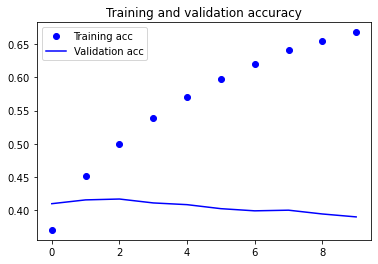

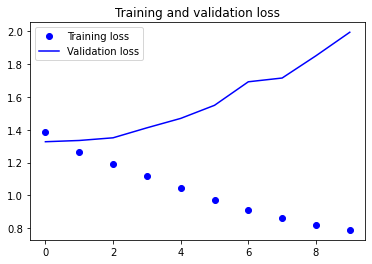

In [38]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Base model with GRU

In [39]:
# Build the Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(128, return_sequences=True))
model.add(GRU(128))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 70, 64)            960000    
                                                                 
 gru_2 (GRU)                 (None, 70, 128)           74496     
                                                                 
 gru_3 (GRU)                 (None, 128)               99072     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 1,134,213
Trainable params: 1,134,213
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Train the Model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
765/765 [==============================] - 65s 80ms/step - loss: 1.3735 - acc: 0.3768 - val_loss: 1.3293 - val_acc: 0.4120
Epoch 2/10
765/765 [==============================] - 61s 80ms/step - loss: 1.2541 - acc: 0.4587 - val_loss: 1.3292 - val_acc: 0.4213
Epoch 3/10
765/765 [==============================] - 61s 80ms/step - loss: 1.1642 - acc: 0.5141 - val_loss: 1.3792 - val_acc: 0.4089
Epoch 4/10
765/765 [==============================] - 61s 79ms/step - loss: 1.0568 - acc: 0.5667 - val_loss: 1.4296 - val_acc: 0.4037
Epoch 5/10
765/765 [==============================] - 62s 81ms/step - loss: 0.9633 - acc: 0.5999 - val_loss: 1.5066 - val_acc: 0.4014
Epoch 6/10
765/765 [==============================] - 61s 80ms/step - loss: 0.8941 - acc: 0.6269 - val_loss: 1.5962 - val_acc: 0.3999
Epoch 7/10
765/765 [==============================] - 61s 79ms/step - loss: 0.8368 - acc: 0.6475 - val_loss: 1.6808 - val_acc: 0.3930
Epoch 8/10
765/765 [==============================] - 62s 80ms

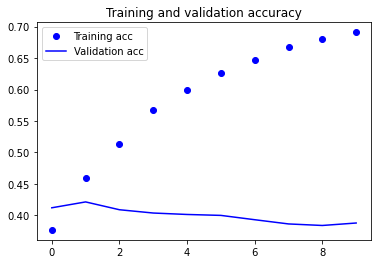

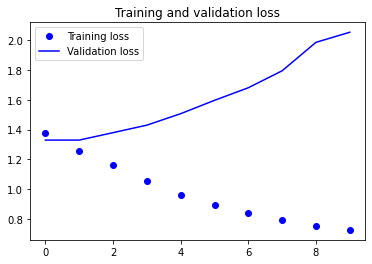

In [41]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

After comparisons on the two models, we can see that our GRU model performs better compared to the LSTM model. Thus, we will be selecting the GRU model for tuning 

#### Adding dropout to first model - 0.3

In [36]:
# Build the Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model.add(GRU(128))
model.add(Dense(5, activation='softmax'))

model.summary()

# Train the Model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 70, 64)            960000    
                                                                 
 gru_2 (GRU)                 (None, 70, 128)           74496     
                                                                 
 gru_3 (GRU)                 (None, 128)               99072     
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 1,134,213
Trainable params: 1,134,213
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
765/765 [==============================] - 84s 104ms/step - loss: 1.3773 - acc: 0.3804 - val_loss: 1.3242 - val_acc: 0.4091
Epoch 2/10
765/765 [=====================

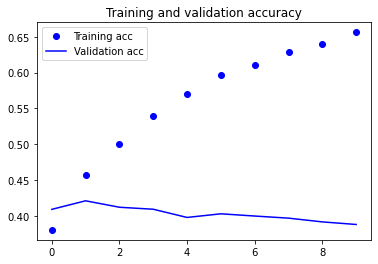

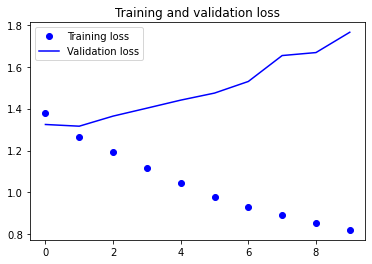

In [37]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can see that there is still overfitting observed, thus adding more dropout


#### Adding more dropout to first model - 0.5

In [38]:
# Build the Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(Dropout(0.5))
model.add(GRU(128, return_sequences=True, recurrent_dropout=0.5))
model.add(Dropout(0.5))
model.add(GRU(128))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.summary()

# Train the Model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 70, 64)            960000    
                                                                 
 dropout (Dropout)           (None, 70, 64)            0         
                                                                 
 gru_4 (GRU)                 (None, 70, 128)           74496     
                                                                 
 dropout_1 (Dropout)         (None, 70, 128)           0         
                                                                 
 gru_5 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                

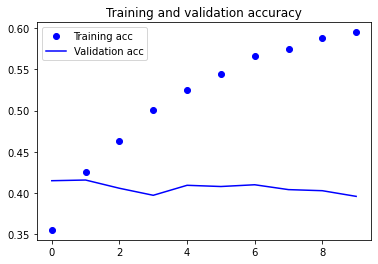

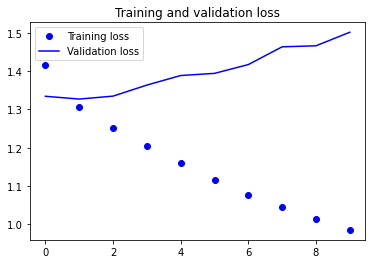

In [39]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

even with dropout at 50%, our model is still overfitting and training accuracy is not improving

#### Testing mode dropout for Model - 0.7

In [42]:
# Build the Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(Dropout(0.7))
model.add(GRU(128, return_sequences=True, recurrent_dropout=0.7))
model.add(Dropout(0.7))
model.add(GRU(128))
model.add(Dropout(0.7))
model.add(Dense(5, activation='softmax'))

model.summary()

# Train the Model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 70, 64)            960000    
                                                                 
 dropout (Dropout)           (None, 70, 64)            0         
                                                                 
 gru_4 (GRU)                 (None, 70, 128)           74496     
                                                                 
 dropout_1 (Dropout)         (None, 70, 128)           0         
                                                                 
 gru_5 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                

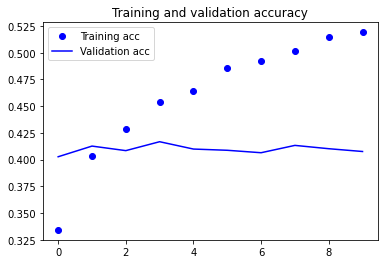

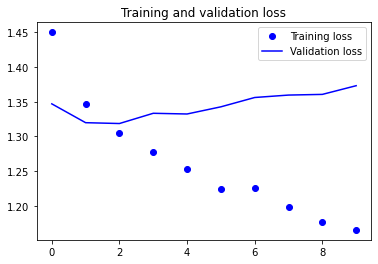

In [43]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Building second model with GRU 64 neurons

By building a model with lesser dimensions, we are hopefully able to reduce the amount of overfitting

In [44]:
# Build the Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(Dropout(0.7))
model.add(GRU(64, return_sequences=True, recurrent_dropout=0.7))
model.add(Dropout(0.7))
model.add(GRU(64))
model.add(Dropout(0.7))
model.add(Dense(5, activation='softmax'))

model.summary()

# Train the Model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 70, 64)            960000    
                                                                 
 dropout_3 (Dropout)         (None, 70, 64)            0         
                                                                 
 gru_6 (GRU)                 (None, 70, 64)            24960     
                                                                 
 dropout_4 (Dropout)         (None, 70, 64)            0         
                                                                 
 gru_7 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                

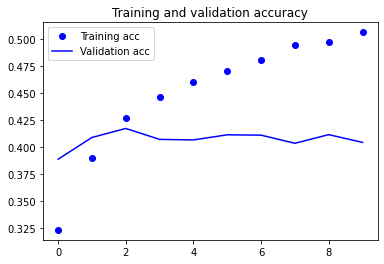

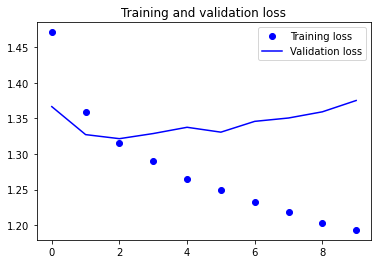

In [45]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Even with lesser batch size, we still can see that overfitting occurs very quickly

### Model 3 with GRU 32 -> 16 neurons

With our final model, we scaled down the density of our model even further to 32 and 16, with an increased amount of dropout to hopefully counter the overfitting

#### Best model (saved)

In [47]:
# Build the Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(Dropout(0.7))
model.add(GRU(32, return_sequences=True, recurrent_dropout=0.7))
model.add(Dropout(0.7))
model.add(GRU(16, recurrent_dropout=0.7))
model.add(Dropout(0.7))
model.add(Dense(5, activation='softmax'))

model.summary()

# Train the Model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 70, 64)            960000    
                                                                 
 dropout_9 (Dropout)         (None, 70, 64)            0         
                                                                 
 gru_10 (GRU)                (None, 70, 32)            9408      
                                                                 
 dropout_10 (Dropout)        (None, 70, 32)            0         
                                                                 
 gru_11 (GRU)                (None, 16)                2400      
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 5)                

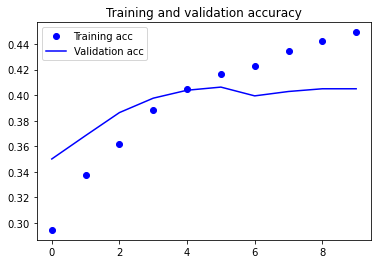

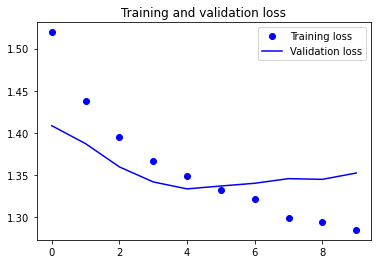

In [48]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Testing different batch size

#### Batch size 64

In [49]:
# Build the Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(Dropout(0.7))
model.add(GRU(32, return_sequences=True, recurrent_dropout=0.7))
model.add(Dropout(0.7))
model.add(GRU(16, recurrent_dropout=0.7))
model.add(Dropout(0.7))
model.add(Dense(5, activation='softmax'))

model.summary()

# Train the Model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 70, 64)            960000    
                                                                 
 dropout_12 (Dropout)        (None, 70, 64)            0         
                                                                 
 gru_12 (GRU)                (None, 70, 32)            9408      
                                                                 
 dropout_13 (Dropout)        (None, 70, 32)            0         
                                                                 
 gru_13 (GRU)                (None, 16)                2400      
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 5)                

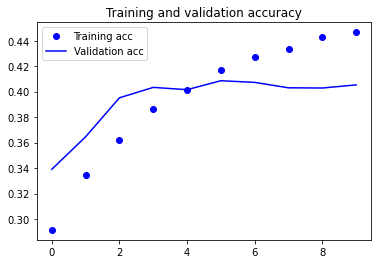

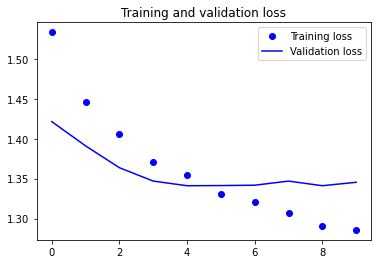

In [50]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Batch size 128

In [51]:
# Build the Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(Dropout(0.7))
model.add(GRU(32, return_sequences=True, recurrent_dropout=0.7))
model.add(Dropout(0.7))
model.add(GRU(16, recurrent_dropout=0.7))
model.add(Dropout(0.7))
model.add(Dense(5, activation='softmax'))

model.summary()

# Train the Model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 70, 64)            960000    
                                                                 
 dropout_15 (Dropout)        (None, 70, 64)            0         
                                                                 
 gru_14 (GRU)                (None, 70, 32)            9408      
                                                                 
 dropout_16 (Dropout)        (None, 70, 32)            0         
                                                                 
 gru_15 (GRU)                (None, 16)                2400      
                                                                 
 dropout_17 (Dropout)        (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 5)                

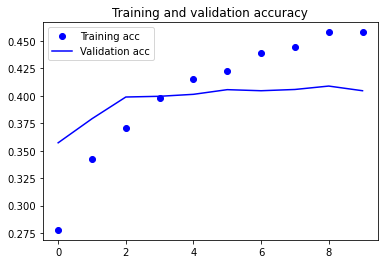

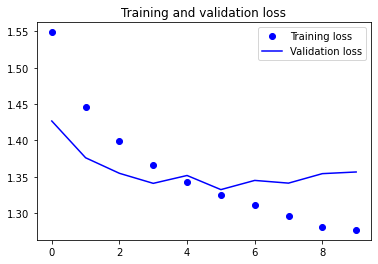

In [52]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
# Save the Model
model.save('best_model_jr.h5')


### Model #2  (Student Name: XXXX)

In [47]:
# Build the Model


In [48]:
# Train the Model


In [49]:
# Plot the Training and Validation Accuracy & Loss Scores


### Model #3  (Student Name: XXXX)

In [50]:
# Build the Model


In [51]:
# Train the Model


In [52]:
# Plot the Training and Validation Accuracy & Loss Scores


In [53]:
# Save the Model
model.save('text_model_2.h5')

### Model #4  (Student Name: XXXX)

In [54]:
# Build the Model


In [55]:
# Train the Model


In [56]:
# Plot the Training and Validation Accuracy & Loss Scores


In [57]:
# Save the Model
model.save('text_model_2.h5')

### Model #5  (Student Name: XXXX)

In [58]:
# Build the Model


In [59]:
# Train the Model


In [60]:
# Plot the Training and Validation Accuracy & Loss Scores


In [61]:
# Save the Model
model.save('text_model_2.h5')

## Step 3 – Evaluate the Model using Testing Data (Individual & Group)

In [ ]:
# Save the Best Model
model.save('text_model_best.h5')

## Step 4 – Use the Best Model to make prediction (Group)

### Exporting Instagram dataset into csv file

In [41]:
insta_dataset = df[['content_final','score']]
insta_dataset.to_csv('insta_dataset.csv', index=False)

## Standardizing accuracy of instagram

### Using snapchat dataset

In [36]:
snapchat_dataset = pd.read_csv("snapchat_dataset.csv")
def strings(text):
    text = str(text)
    return text
snapchat_dataset['content_final'] = snapchat_dataset['content_final'].apply(lambda x:strings(x))


In [37]:
#parameter for tokenizing n padding
X_snapchat = snapchat_dataset['content_final']
y_snapchat = snapchat_dataset['score']

snapchat_train_seqs = tokenizer.texts_to_sequences(snapchat_dataset['content_final'])
snapchat_train_padded = pad_sequences(snapchat_train_seqs, maxlen=max_length, truncating=trunc_type, padding = "pre")
X_train_snapchat, X_test_snapchat, y_train_snapchat, y_test_snapchat = train_test_split(snapchat_train_padded,
                                                                                        y_snapchat, test_size = 0.2, 
                                                                                        random_state=42)

### Using Disney+ dataset

In [38]:
disney_dataset = pd.read_csv("disney_dataset.csv")
def strings(text):
    text = str(text)
    return text
disney_dataset['content_final'] = disney_dataset['content_final'].apply(lambda x:strings(x))

In [39]:
#parameter for tokenizing n padding
X_disney = disney_dataset['content_final']
y_disney = disney_dataset['score']

disney_train_seqs = tokenizer.texts_to_sequences(disney_dataset['content_final'])
disney_train_padded = pad_sequences(disney_train_seqs, maxlen=max_length, truncating=trunc_type, padding = "pre")
X_train_disney, X_test_disney, y_train_disney, y_test_disney = train_test_split(disney_train_padded, y_disney, test_size = 0.2, random_state=42)

### Using Temple Run dataset

In [40]:
templerun_dataset = pd.read_csv("templerun_dataset.csv")
def strings(text):
    text = str(text)
    return text
templerun_dataset['content_final'] = templerun_dataset['content_final'].apply(lambda x:strings(x))

In [41]:
#parameter for tokenizing n padding
X_templerun = templerun_dataset['content_final']
y_templerun = templerun_dataset['score']

templerun_train_seqs = tokenizer.texts_to_sequences(templerun_dataset['content_final'])
templerun_train_padded = pad_sequences(templerun_train_seqs, maxlen=max_length, truncating=trunc_type, padding = "pre")
X_train_templerun, X_test_templerun, y_train_templerun, y_test_templerun = train_test_split(templerun_train_padded, y_templerun, test_size = 0.2, random_state=42)

### Using Facebook dataset

In [42]:
facebook_dataset = pd.read_csv("facebook_dataset.csv")
def strings(text):
    text = str(text)
    return text
facebook_dataset['content_final'] = facebook_dataset['content_final'].apply(lambda x:strings(x))

In [43]:
#parameter for tokenizing n padding
X_facebook = facebook_dataset['content_final']
y_facebook = facebook_dataset['score']

facebook_train_seqs = tokenizer.texts_to_sequences(facebook_dataset['content_final'])
facebook_train_padded = pad_sequences(facebook_train_seqs, maxlen=max_length, truncating=trunc_type, padding = "pre")
X_train_facebook, X_test_facebook, y_train_facebook, y_test_facebook = train_test_split(facebook_train_padded, y_facebook, test_size = 0.2, random_state=42)

### Using Instagram dataset

## Evaluating test accuracy for the Instagram model across all 5 datasets

In [44]:
model = keras.models.load_model("best_model_jr.h5")

In [45]:
print("[Instagram model] Test accuracy of snapchat dataset: {:.3%}"
      .format(model.evaluate(X_test_snapchat, y_test_snapchat, batch_size = 32)[1]))

238/238 [==============================] - 4s 13ms/step - loss: 2.1271 - acc: 0.3045
[Instagram model] Test accuracy of snapchat dataset: 30.451%


In [46]:
print("[Instagram model] Test accuracy of Disney+ dataset: {:.3%}"
      .format(model.evaluate(X_test_disney, y_test_disney, batch_size = 32)[1]))

243/243 [==============================] - 3s 13ms/step - loss: 2.3973 - acc: 0.3342
[Instagram model] Test accuracy of Disney+ dataset: 33.419%


In [47]:
print("[Instagram model] Test accuracy of Temple Run dataset: {:.3%}"
      .format(model.evaluate(X_test_templerun, y_test_templerun, batch_size = 32)[1]))

238/238 [==============================] - 3s 13ms/step - loss: 2.3424 - acc: 0.2484
[Instagram model] Test accuracy of Temple Run dataset: 24.839%


In [48]:
print("[Instagram model] Test accuracy of Facebook dataset: {:.3%}"
      .format(model.evaluate(X_test_facebook, y_test_facebook, batch_size = 32)[1]))

250/250 [==============================] - 2s 10ms/step - loss: 2.3542 - acc: 0.2783
[Instagram model] Test accuracy of Facebook dataset: 27.825%


In [52]:
print("[Instagram model] Test accuracy of Instagram dataset: {:.3%}"
      .format(model.evaluate(X_test, y_test, batch_size = 32)[1]))

239/239 [==============================] - 2s 9ms/step - loss: 1.3485 - acc: 0.4117
[Instagram model] Test accuracy of Instagram dataset: 41.175%
